In [1]:
from sklearn2pmml import sklearn2pmml
import pandas as pd
from sklearn2pmml.pipeline import PMMLPipeline
import matplotlib.pyplot as plt # visualization

**Don't forget to change root**

In [2]:
root = "/home/sihartist/Desktop/"

Useful function for evaluation

In [3]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve, average_precision_score
from sklearn.metrics import balanced_accuracy_score, matthews_corrcoef

def performance_report(model, X, y_true, target_names=None):
        y_pred = model.predict(X)
        
        score_tr = model.score(X, y_true)
        print('Accuracy Score: ', score_tr)
        print("")
        bal_acc_te = balanced_accuracy_score(y_true, y_pred)
        print('Balanced Accuracy: ', bal_acc_te)
        print("")
        mat_corr_coeff_te = matthews_corrcoef(y_true, y_pred)
        print('Matthews Correlation Coefficient: ', mat_corr_coeff_te)
        print("")

        print(classification_report(y_true, y_pred, target_names=target_names))
        print('--------------------------------------------------------')

        matrix = plot_confusion_matrix(model, X, y_true, cmap=plt.cm.Blues, display_labels=target_names)
        matrix.ax_.set_title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.xticks(rotation=90)
        plt.show()
        print("")

## Model SVM

In [4]:
df = pd.read_csv(root + 'fraud-detection/dataset/data_balanced.csv')

df = df.iloc[:,1:]

df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFlaggedFraud,isFraud
0,139,265803.35,0.00,0.00,751669.39,1017472.74,0,1,0,0,0,0,0
1,589,11278.28,0.00,0.00,220970.84,232249.12,0,1,0,0,0,0,0
2,284,16363.06,35966.16,19603.10,0.00,0.00,0,0,0,1,0,0,0
3,37,107223.31,20752629.71,20859853.02,804594.62,571711.22,1,0,0,0,0,0,0
4,287,3678.25,0.00,0.00,0.00,0.00,0,0,0,1,0,0,0


In [5]:
# Split the data into features and target variable
X = df.drop("isFraud", axis=1)
y = df["isFraud"]

X = X.values
y = y.values

print(X.shape)
print(y.shape)

(16426, 12)
(16426,)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

## Train the model with PMML wraper
clf = PMMLPipeline(
    [
        (
            "Standard Scaler",
            StandardScaler()
        )
        ,
        (
            "SVM",
            SVC(gamma='auto')
        )
    ]
)

X_train = pd.DataFrame(X_train, columns = list(df.columns.values[:12]))
y_train = pd.Series(y_train, name = "isFraud")
X_test = pd.DataFrame(X_test, columns = list(df.columns.values[:12]))
y_test = pd.Series(y_test, name = "isFraud")

# Train the model
clf.fit(X_train, y_train)

PMMLPipeline(steps=[('Standard Scaler', StandardScaler()),
       ('SVM', SVC(gamma='auto'))])

### testing model

Accuracy Score:  0.9155137428518724

Balanced Accuracy:  0.9151308922474133

Matthews Correlation Coefficient:  0.8346852203817814

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2732
           1       0.96      0.87      0.91      2689

    accuracy                           0.92      5421
   macro avg       0.92      0.92      0.92      5421
weighted avg       0.92      0.92      0.92      5421

--------------------------------------------------------


/home/sihartist/miniconda3/envs/my-env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


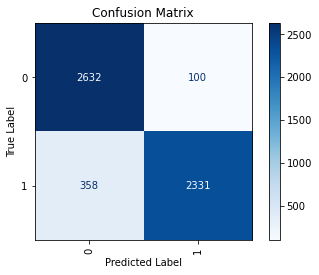

In [8]:
performance_report(clf, X_test, y_test, target_names=None)

## saving model

Pickle

In [9]:
import pickle

filename = root + "fraud-detection/algo/models/svm.pkl"
pickle.dump(clf, open(filename, "wb"))

PMML

In [13]:
filename = root + "fraud-detection/algo/models/svm.pmml"
filename_java = root + "SpringAPI/src/main/resources/models/svm.pmml"

sklearn2pmml(clf, filename, with_repr = True)
sklearn2pmml(clf, filename_java, with_repr = True)

## loading model

In [11]:
from pypmml import Model

In [12]:
loaded_model = Model.load(filename)
loaded_model.predict(X_test.iloc[0])

predicted_isFraud    1.0
probability          1.0
probability_0        0.0
probability_1        1.0
Name: 0, dtype: float64